For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

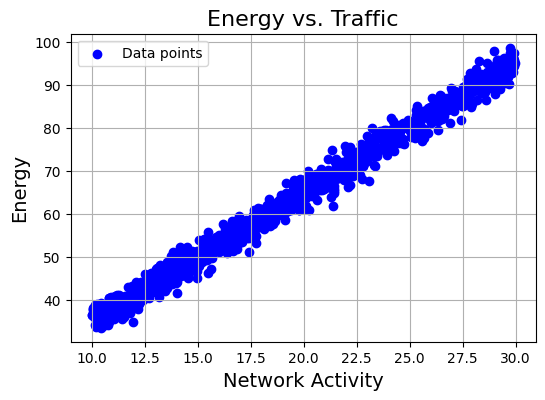

In [ ]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

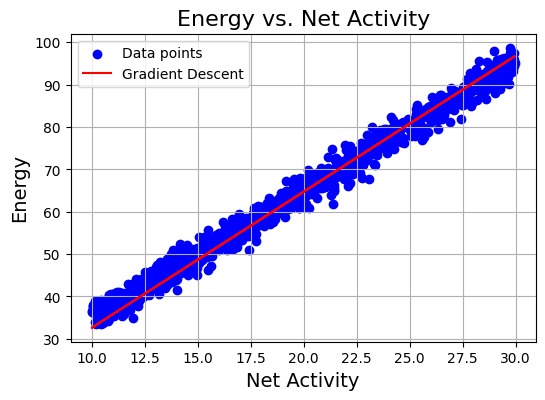

Weights: [3.21171009]
Bias: 0.4939486713133614


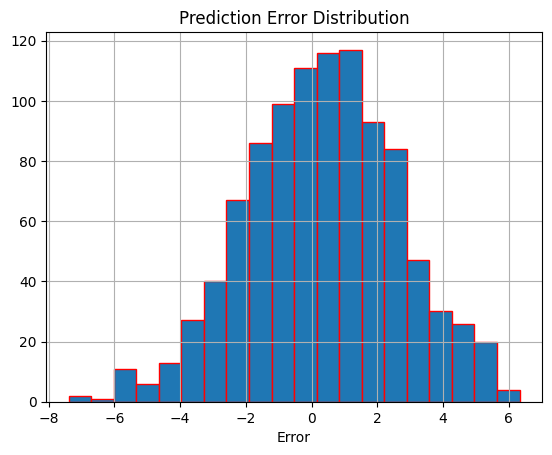

In [ ]:
data = pd.read_csv('mission1.csv')

lr = LinearRegression() #Creates an instance of the class

lr.fit(data['Net_Activity'], data['Energy'])

y_pred = lr.predict(data['Net_Activity'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], color='blue', label='Data points')
plt.plot(data['Net_Activity'], y_pred, color='red', label='Gradient Descent')
plt.title('Energy vs. Net Activity', fontsize=16)
plt.xlabel('Net Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

print("Weights:", lr.weights)
print("Bias:", lr.bias)

error = data['Energy'] - y_pred
plt.figure()
plt.hist(error, bins=20, edgecolor="red")
plt.title('Prediction Error Distribution')
plt.xlabel('Error')
plt.ylabel('')
plt.grid(True)
plt.show()


### Discussion

#### a

Using the graph above we get weight = 3.212 and Bias 0.494 giviing the formula E = 3.212*N+0.494

#### b 

An unbiased estimator has the same expected values as its true value. In gradient descent an unbiased estimator is important so the updated estimator points in the right direction



## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [ ]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train'].copy()
test = data[data['split'] == 'test'].copy()

X_train = train[["x0", "x1"]].values
y_train = train["y"].values  
X_test = test[["x0", "x1"]].values
y_test = train["y"].values

from logistical_regression import LogisticalRegression # <--- This is your implementation

logReg = LogisticalRegression()

logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

print(logReg.accuracy(y_test, y_pred))

>>> fit() called, starting training
0.522


a) The original model could only learn linear decisions based in the 2D plane. If the decision boundary is curved or depends on interactions between x0 and x1, this model will work poorly: Hence 0.52

value is still low. will try more mathematic relations as features

In [ ]:
train['x2'] = train['x0'] * train['x1']
test['x2'] = test['x0'] * test['x1']

train['x3'] = train['x0'] / train['x1']
test['x3'] = test['x0'] / test['x1']

X_train = train[['x0', 'x1', 'x2', 'x3']].values
y_train = train['y'].values
X_test = test[['x0', 'x1', 'x2', 'x3']].values
y_test = test['y'].values

logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

print(logReg.accuracy(y_test, y_pred))

>>> fit() called, starting training
0.932


when i added more features the model saw more relations between x0 and x1 and therefore predicted higher accuracy. Te increase by adding + and - was minimal so could be seen as overfitting.

b) Inductive bias is that the model uses assumptions from training data to test data. In this case it assumes the data is linearly connected therefore the prediction was poor in the beginning.

c) Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data_ = pd.read_csv('mission2.csv')
train_ = data_[data_['split'] == 'train'].copy()
test_ = data_[data_['split'] == 'test'].copy()

X_train_ = train_[["x0", "x1"]].values
y_train_ = train_["y"].values  
X_test_ = test_[["x0", "x1"]].values
y_test_ = test_["y"].values

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train_, y_train_)

y_pred_ = clf.predict(X_test_)

accuracy = accuracy_score(y_test_, y_pred_)
print(f'Accuracy: {accuracy}')

Accuracy: 0.878


Yes, decision tree can solve it. But this time without feature engineering. DTC find nonlinear connections by itself

d) Plot the roc curve

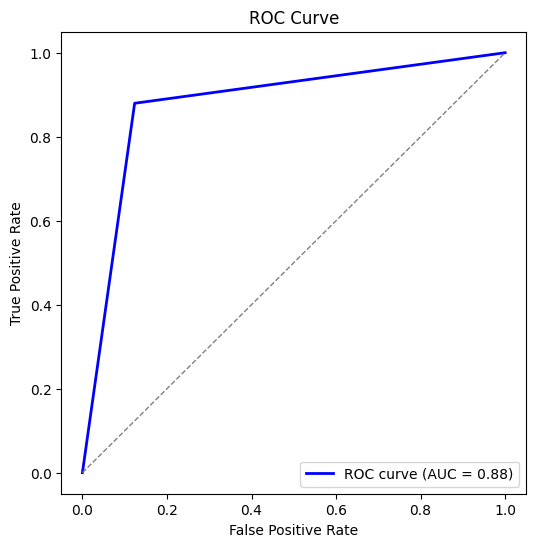

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = clf.predict_proba(X_test_)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test_, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
# Load data
df_train = pd.read_csv('mission3_train.csv')
df_test  = pd.read_csv('mission3_test.csv')

X_train = df_train.drop(columns=['target'])
X_test  = df_test.drop(columns=['target'])

# Add binary feature
binary_train = (X_train['data_stream_3'] * 1e3).astype(int) % 2
binary_test  = (X_test['data_stream_3'] * 1e3).astype(int) % 2
X_train['data_stream_binary'] = binary_train
X_test['data_stream_binary'] = binary_test

y_train = df_train['target'].values
y_test  = df_test['target'].values

'''
param_grid = {
    'max_depth': [2, 3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 7, 10, 20],
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all cores
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict with best model
best_clf = grid_search.best_estimator_
y_probs = best_clf.predict_proba(X_test)[:, 1]

'''
clf = DecisionTreeClassifier(
    max_depth=5,
    max_features= None,
    min_samples_leaf=1,
    min_samples_split=10,
    random_state=34
)


# Fit grid search
clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)[:, 1]
# Evaluate ROC AUC

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC on test set:", roc_auc)


ROC AUC on test set: 0.7282240563463477


a) i used gridsearchcv to find the best params for the  dtc. 

b) Because the task is a binary classification problem, we report the ROC AUC usage as a primary evaluation metric. Unlike accuracy, which depends on a fixed threshold, ROC AUC measures the models discriminative ability across all thresholds.

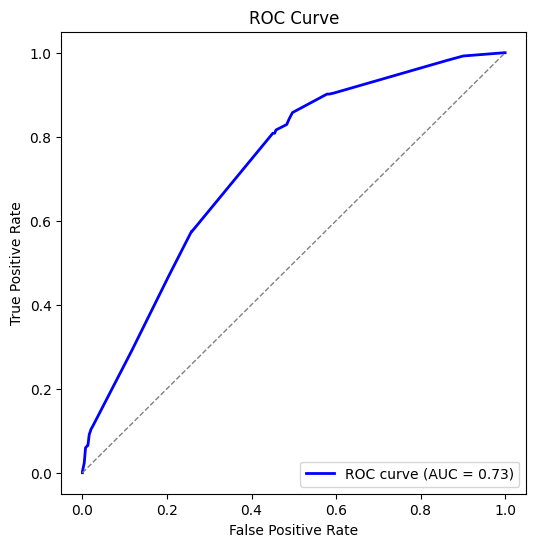

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_probs = clf.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

c)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


clf = RandomForestClassifier(random_state=12)
# Load data
df_train = pd.read_csv('mission3_train.csv')
df_test  = pd.read_csv('mission3_test.csv')

X_train = df_train.drop(columns=['target'])
X_test  = df_test.drop(columns=['target'])

# Add binary feature
binary_train = (X_train['data_stream_3'] * 1e3).astype(int) % 2
binary_test  = (X_test['data_stream_3'] * 1e3).astype(int) % 2
X_train['data_stream_binary'] = binary_train
X_test['data_stream_binary'] = binary_test

y_train = df_train['target'].values
y_test  = df_test['target'].values

clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, 1]
# Evaluate ROC AUC

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC on test set:", roc_auc)


ROC AUC on test set: 0.7165884970240961


random forest does the job just as well

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [5]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [6]:
# Test data should be shifted one step "down" and jump over ownership type

# List of columns to shift (exclude 'ownership_type')
cols_to_shift = [col for col in test.columns if col != 'ownership_type']

# Shift values one column to the right
shifted_values = test[cols_to_shift].values
shifted_values = np.roll(shifted_values, shift=1, axis=1)  # circular shift

# Assign back
test[cols_to_shift] = shifted_values

Text(0, 0.5, 'Count')

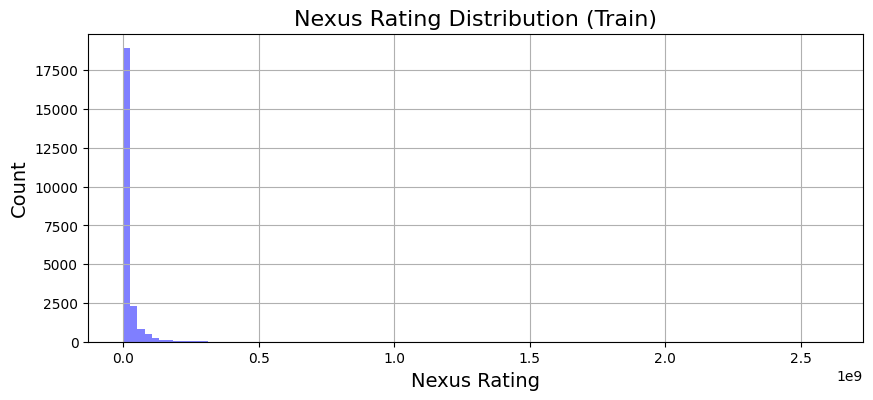

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [9]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [36]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV


X_train = train.drop(columns=['nexus_rating'])
y_train = train['nexus_rating'].values

X_test = test.drop(columns=["nexus_rating"])
y_test = test["nexus_rating"].values

cat = CatBoostRegressor(
    iterations=2000, 
    learning_rate=0.05, 
    depth=8, 
    l2_leaf_reg=20, 
    early_stopping_rounds=200
)

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

estimators = [
    ('cat', cat),
    ('rf', rf)
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(alphas=(0.1, 1.0, 10.0)),
    cv=5,                # out-of-fold preds for meta-learner
    n_jobs=-1,
    passthrough=False    # set True if you want original features passed to meta-learner
)

y_train = np.log1p(y_train)

stack.fit(X_train, y_train)

# Predict and inverse-transform
y_pred = stack.predict(X_test) 
y_pred = np.expm1(y_pred)

print('RMSLE: ', rmsle(y_test, y_pred))
print('Required RMSLE: ', 0.294)

0:	learn: 0.8337518	total: 75.5ms	remaining: 2m 30s
1:	learn: 0.8062247	total: 92.7ms	remaining: 1m 32s
2:	learn: 0.7778503	total: 97.5ms	remaining: 1m 4s
3:	learn: 0.7511753	total: 112ms	remaining: 56.1s
4:	learn: 0.7273277	total: 131ms	remaining: 52.1s
5:	learn: 0.7040170	total: 146ms	remaining: 48.5s
6:	learn: 0.6817731	total: 154ms	remaining: 43.9s
7:	learn: 0.6609271	total: 164ms	remaining: 41s
8:	learn: 0.6411796	total: 181ms	remaining: 40.1s
9:	learn: 0.6223143	total: 190ms	remaining: 37.9s
10:	learn: 0.6048959	total: 196ms	remaining: 35.5s
11:	learn: 0.5883414	total: 211ms	remaining: 34.9s
12:	learn: 0.5723781	total: 225ms	remaining: 34.4s
13:	learn: 0.5581533	total: 243ms	remaining: 34.5s
14:	learn: 0.5438550	total: 263ms	remaining: 34.8s
15:	learn: 0.5311151	total: 362ms	remaining: 44.9s
16:	learn: 0.5184234	total: 468ms	remaining: 54.5s
17:	learn: 0.5072756	total: 500ms	remaining: 55.1s
18:	learn: 0.4961756	total: 537ms	remaining: 56s
19:	learn: 0.4857326	total: 579ms	remain

a, d) My threshold breaking strategy involved stacking models. I was already at 0.2952 but couldnt get any lower. Usually when a model is fine tuned and stuck, it is better to incorporate more models to get the last performance boost. I  chose catboost and randomforest because catboost is good at catching complex unlinearities, randomforest stabilizes predictions with variance reduction. Adding random forest got me down to the last 0.2926...

b) RMSLE was chosen as the evaluation metric because it is well-suited for positive, skewed target variables such as ratings. Unlike RMSE, RMSLE penalizes relative errors rather than absolute differences, meaning predictions are evaluated proportionally to the true value, which aligns with the task’s goals.

c)

0:	learn: 0.8337518	total: 10.2ms	remaining: 20.4s
1:	learn: 0.8062247	total: 18.1ms	remaining: 18.1s
2:	learn: 0.7778503	total: 23.2ms	remaining: 15.5s
3:	learn: 0.7511753	total: 34.1ms	remaining: 17s
4:	learn: 0.7273277	total: 41.2ms	remaining: 16.4s
5:	learn: 0.7040170	total: 45.7ms	remaining: 15.2s
6:	learn: 0.6817731	total: 50.6ms	remaining: 14.4s
7:	learn: 0.6609271	total: 55.6ms	remaining: 13.8s
8:	learn: 0.6411796	total: 59.9ms	remaining: 13.2s
9:	learn: 0.6223143	total: 64.1ms	remaining: 12.8s
10:	learn: 0.6048959	total: 67.7ms	remaining: 12.2s
11:	learn: 0.5883414	total: 80.3ms	remaining: 13.3s
12:	learn: 0.5723781	total: 86.1ms	remaining: 13.2s
13:	learn: 0.5581533	total: 91.5ms	remaining: 13s
14:	learn: 0.5438550	total: 99.7ms	remaining: 13.2s
15:	learn: 0.5311151	total: 108ms	remaining: 13.4s
16:	learn: 0.5184234	total: 116ms	remaining: 13.5s
17:	learn: 0.5072756	total: 124ms	remaining: 13.7s
18:	learn: 0.4961756	total: 132ms	remaining: 13.8s
19:	learn: 0.4857326	total: 13

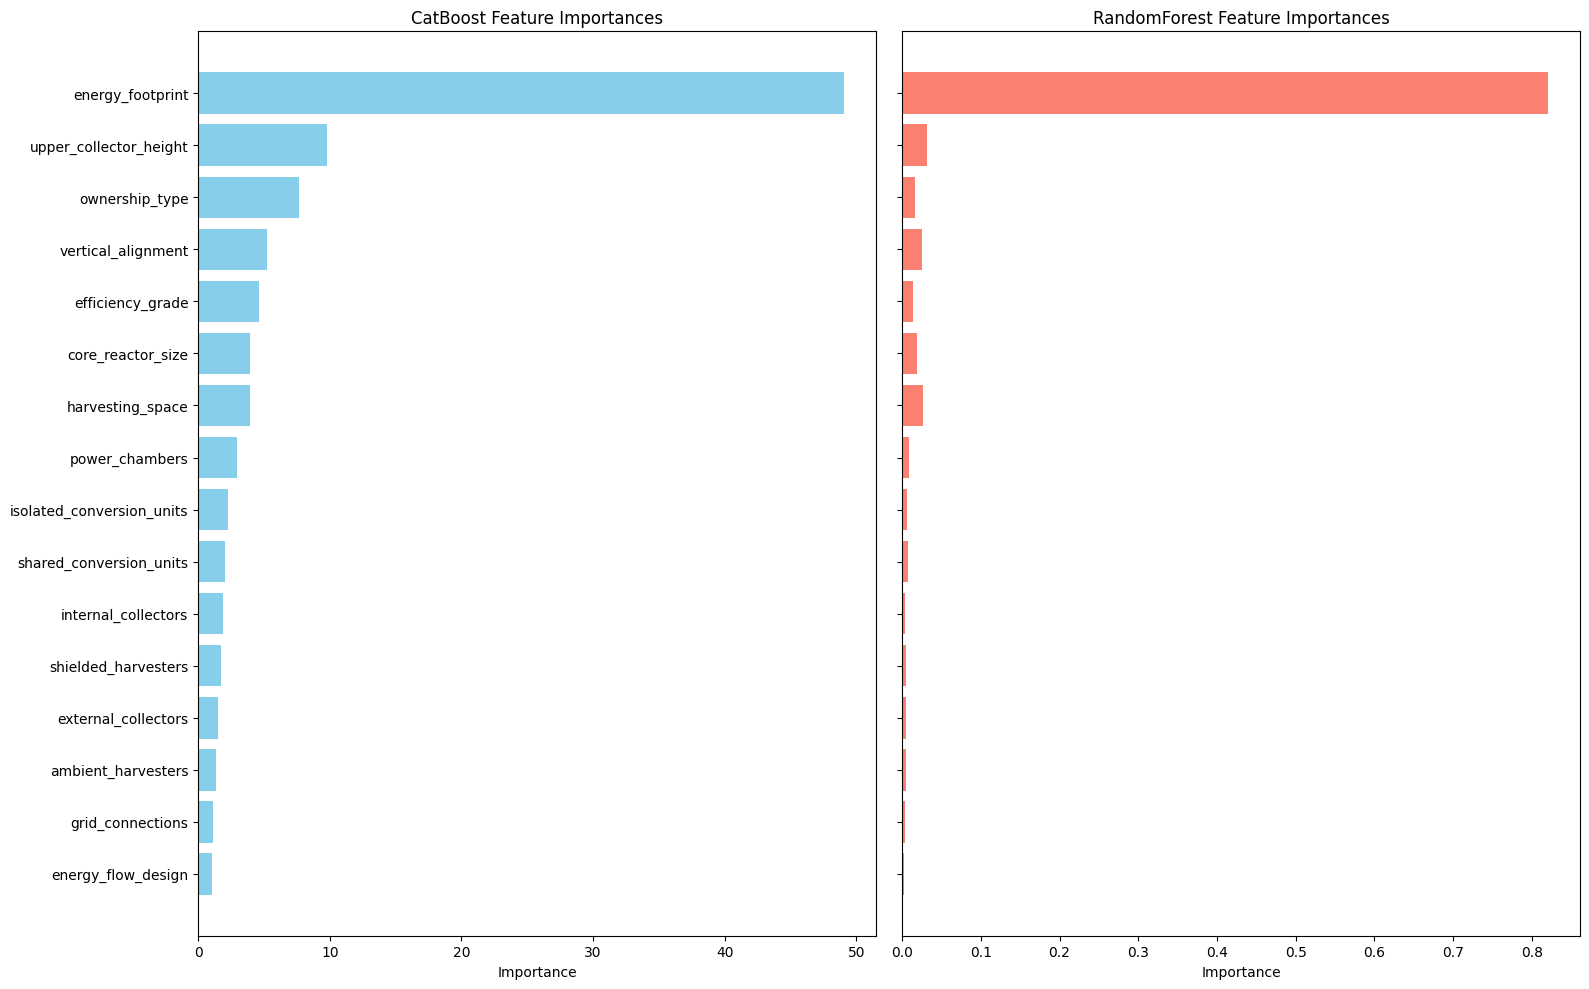

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Fit base models separately
cat.fit(X_train, y_train)
rf.fit(X_train, y_train)

cat_importances = cat.get_feature_importance()
rf_importances = rf.feature_importances_
feature_names = X_train.columns

# Sort by CatBoost importance
indices = np.argsort(cat_importances)

# Side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(16,10), sharey=True)

axes[0].barh(feature_names[indices], cat_importances[indices], color='skyblue')
axes[0].set_title("CatBoost Feature Importances")
axes[0].set_xlabel("Importance")

axes[1].barh(feature_names[indices], rf_importances[indices], color='salmon')
axes[1].set_title("RandomForest Feature Importances")
axes[1].set_xlabel("Importance")

plt.tight_layout()
plt.show()


based on the graph it seems like enery footprint is the single most important value for nexus_rating. Im guessing the other features only points the nexus_rating in another direction slightly.

e) To ensure that the model would perform well on unseen data, cross-validation was used to estimate out-of-sample performance and guide hyperparameter tuning. Regularization and early stopping were applied to prevent overfitting, and features were carefully engineered to avoid leakage. Ensembling improved robustness, and in a real-world setting, performance monitoring and periodic retraining would be necessary to maintain accuracy over time as new data becomes available.